In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import distances
import itertools
import pandas as pd
from read_input import read_pdbs
import numpy as np

In [2]:
def make_dataframe(fibril_pdb, cutoff):

    atom_list = []
    for atom in fibril_pdb.atoms:
        atp = str(atom.name) + '_' + str(atom.resnum)
        atom_list.append(atp)
    pairs_list = list(itertools.combinations(atom_list, 2))
    atom_sel = fibril_pdb.select_atoms('all')
    self_distances = distances.self_distance_array(atom_sel.positions)
    pairs_ai, pairs_aj = [], []
    for n in range(0, len(pairs_list)):
        i = pairs_list[n][0]
        pairs_ai.append(i)
        j = pairs_list[n][1]
        pairs_aj.append(j)
    raw_structural_LJ = pd.DataFrame(columns = ['ai', 'aj', 'distance'])
    raw_structural_LJ['ai'] = pairs_ai
    raw_structural_LJ['aj'] = pairs_aj
    raw_structural_LJ['distance'] = self_distances
    structural_LJ = raw_structural_LJ[raw_structural_LJ.distance < cutoff]

    return(structural_LJ)


In [3]:
fibril_directory = 'fibril_%s/conf.pdb' %('TTR')
fibrillone = mda.Universe(fibril_directory, guess_bonds = True)

fibril_directory = 'fibril_%s/proto.pdb' %('TTR')
proto_fibril = mda.Universe(fibril_directory, guess_bonds = True)

fibril_directory = 'fibril_%s/proto_double.pdb' %('TTR')
double_proto_fibril = mda.Universe(fibril_directory, guess_bonds = True)


/home/emanuele/anaconda2/envs/py37/lib/python3.7/site-packages/MDAnalysis/core/topologyattrs.py:2261: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(sorted(unique_bonds)), 4)


In [6]:
cutoff = 6
histo_data_fibrillone = make_dataframe(fibrillone, cutoff)
histo_proto_fibril = make_dataframe(proto_fibril, cutoff)
histo_double_proto_fibril = make_dataframe(double_proto_fibril, cutoff)


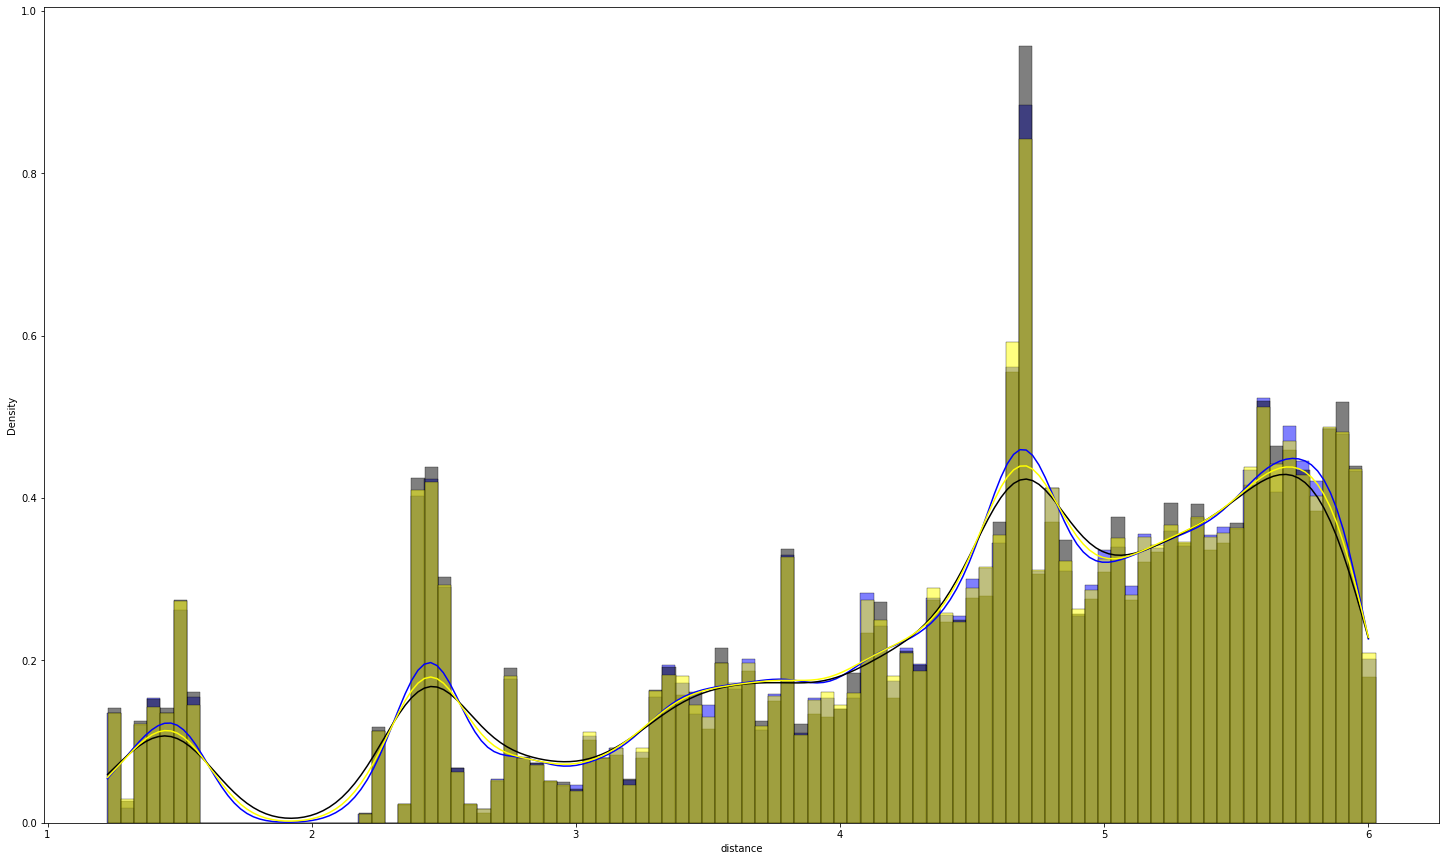

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.histplot(data=histo_data_fibrillone, x = 'distance', stat = 'density', binwidth = 0.05, kde=True, color='blue') #azzurro
sns.histplot(data=histo_proto_fibril, x = 'distance', stat = 'density', binwidth = 0.05, kde=True, color='black') #rosa
sns.histplot(data=histo_double_proto_fibril, x = 'distance', stat = 'density', binwidth = 0.05, kde=True, color='yellow') #oro
#ax.set_xlim(1,31)
fig.set_size_inches(25, 15)


